**Accuracy, Recall, Precision, F1 Score can be find out using classification_report method under metrics library.<br/> 
  Now lets implement some other performance metrics.**

## ROC Curves and AUC
    * ROC – Receiver Operating Characteristics
    * AUC – Area Under the ROC Curve
*ROC – Plot of True Positive Rate vs False Positive Rate, i.e., Sensitivity vs 1-Specificity*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

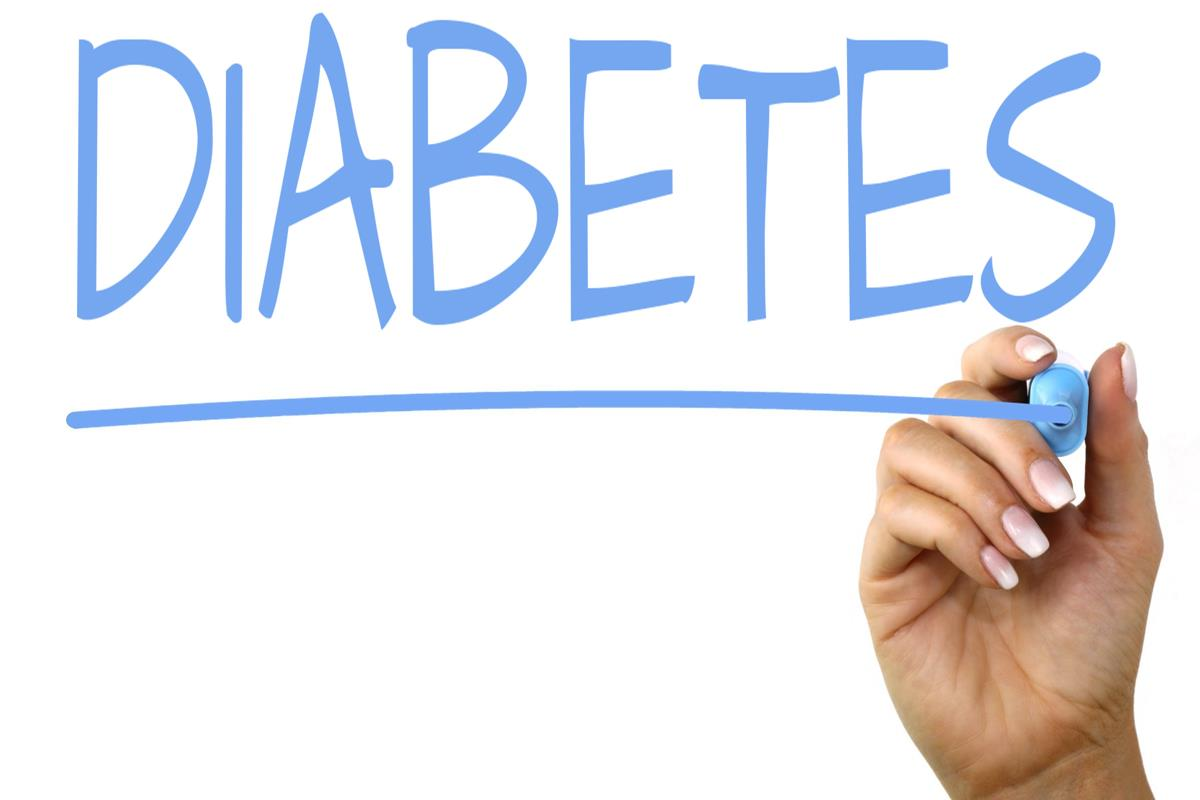

In [2]:
from IPython.display import Image
Image(filename="diabetes_roc.jpg")

In [3]:
data = pd.read_csv("diabetes.csv")
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


**Pregnancies**:- How many times patient has gone through Pregnancies?<br/>
**Glucose**:- Amount of glucose in a body.<br/>
**BloodPressure**:- BloodPressure of the Patients.<br/>
**DiabetesPedigreeFunction**:- Function that can tell you about the like-hood of having diabetes.<br/>
**Outcome**:- Binary classification having(1 and 0), where 1 represent 'Diabetes' and 0 represent 'No_Diabetes'.<br/>

In [4]:
X = data.iloc[:,0:-1].values
y = data.iloc[:, -1].values

##### Train Test Split

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=4)

##### Feature Scaling

In [6]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

##### SVM Classifier

In [7]:
from sklearn.svm import SVC
model_svc = SVC(kernel='rbf', random_state=4)
model_svc.fit(X_train, y_train)
##
y_pred_svm = model_svc.decision_function(X_test)

##### Logistic Classifier

In [8]:
from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression()
model_log.fit(X_train, y_train)
##
y_pred_logistic = model_log.decision_function(X_test) 

C:\Users\kunal95\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


**Whereas predict function will give us probability value from 0 to 1, and decision function output represents whether a predicted sample for x_test<br/>by the classifier lies to the right side or left side of hyperplane and also how far from it. It also tells us how confidently each value predicted<br/>for x_test by the classifier is Positive ( large-magnitude Positive value ) or Negative ( large-magnitude Negative value).<br/>Recall that the functional form of logistic regression is:<br/>f(x)=11+e−(β0+β1x1+⋯+βkxk)<br/>This is what is returned by predict_proba.<br/>The term inside the exponential<br/>d(x)=β0+β1x1+⋯+βkxk**

## Plot Roc and Compare AUC

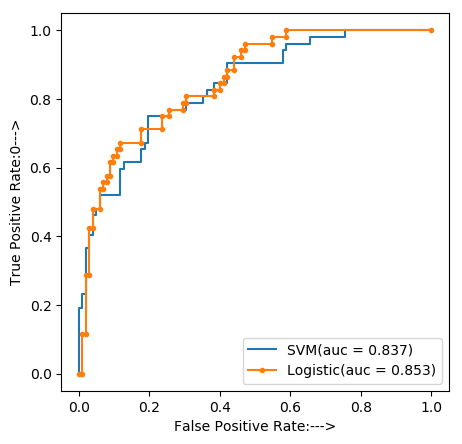

In [9]:
from sklearn.metrics import roc_curve, auc

# roc_curve return three things fpr,tpr and threshold.
logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_logistic)
auc_logistic = auc(logistic_fpr, logistic_tpr)

svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_pred_svm)
auc_svm = auc(svm_fpr, svm_tpr)

plt.figure(figsize=(5,5), dpi=100)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label = 'SVM(auc = %0.3f)' % auc_svm)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label = 'Logistic(auc = %0.3f)' % auc_logistic)

plt.xlabel("False Positive Rate:--->")
plt.ylabel("True Positive Rate:--->")

plt.legend()
plt.show()

Hence better model is acheived whose auc is greater, hence by looking above graph we can say that we will use logistic Regression

In [ ]:
# Here when we predict, we use prediction function but in case we want a plot ROC curve, we use decision_function. It basically
# output a number which basically tell you how far the point is from classification plane. Suppose we have n-features,and assumes
# our classifier is lie in that n-dimensions plane,where decision_function will return distance of point X_test from that plane.